In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train/Train.csv


**Hypothesis Generation Based On Various Factors**
in our problem there is various factors that affect sales of each item 
> **these are some factors:**
* item price: Lower-priced items may have higher sales than higher-priced items, due to greater affordability.
* item quality: Higher-quality items may have higher sales than lower-quality items, due to greater customer satisfaction.
* item availability: items that are frequently out of stock may have lower sales than items that are consistently in stock.
* Promotion and advertising: items that are mostly promoted or advertised correctly may have higher sales than items that are not.


In [2]:
data = pd.read_csv('/kaggle/input/train/Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**check data set deminssion**

In [3]:
data.shape

(8523, 12)

**check data type of data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**to see the minimum value, mean values, different percentile values, and maximum values.**

In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**check how many missing values there in data set**

In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

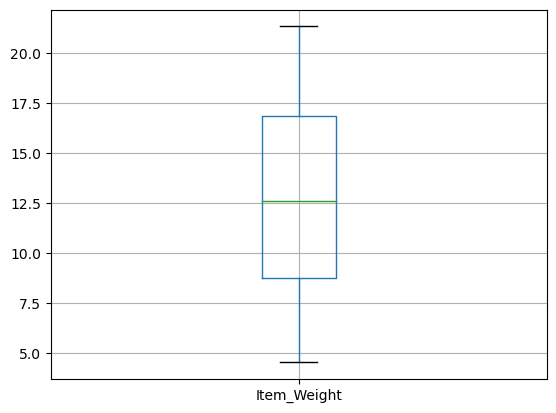

In [7]:
data.boxplot(column='Item_Weight')
median=data['Item_Weight'].median()
data['Item_Weight']=data['Item_Weight'] .replace(np.nan,median)

In [8]:
data['Outlet_Size'] = data['Outlet_Size'].astype('category')
data['Outlet_Size_encoded'], _ = pd.factorize(data['Outlet_Size'])
data['Outlet_Size_encoded'] = data['Outlet_Size'].cat.codes

data['Item_Identifier'] = data['Item_Identifier'].astype('category')
data['Item_Identifier_encoded'], _ = pd.factorize(data['Item_Identifier'])
data['Item_Identifier_encoded'] = data['Item_Identifier'].cat.codes

data['Item_Fat_Content'] = data['Item_Fat_Content'].astype('category')
data['Item_Fat_Content_encoded'], _ = pd.factorize(data['Item_Fat_Content'])
data['Item_Fat_Content'] = data['Item_Fat_Content'].cat.codes

data['Outlet_Identifier'] = data['Outlet_Identifier'].astype('category')
data['Outlet_Identifier_encoded'], _ = pd.factorize(data['Outlet_Identifier'])
data['Outlet_Identifier_encoded'] = data['Outlet_Identifier'].cat.codes

data['Item_Type'] = data['Item_Type'].astype('category')
data['Item_Type_encoded'], _ = pd.factorize(data['Item_Type'])
data['Item_Type_encoded'] = data['Item_Type'].cat.codes

data['Outlet_Type'] = data['Outlet_Type'].astype('category')
data['Outlet_Type_encoded'], _ = pd.factorize(data['Outlet_Type'])
data['Outlet_Type_encoded'] = data['Outlet_Type'].cat.codes
#Original data
data.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_encoded,Item_Identifier_encoded,Item_Fat_Content_encoded,Outlet_Identifier_encoded,Item_Type_encoded,Outlet_Type_encoded
0,FDA15,9.300,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,156,0,9,4,1
1,DRC01,5.920,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,8,1,3,14,2
2,FDN15,17.500,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,662,0,9,10,1
3,FDX07,19.200,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,-1,1121,1,0,6,0
4,NCD19,8.930,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,1297,0,1,9,1
5,FDP36,10.395,2,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,1,758,1,3,0,2
6,FDO10,13.650,2,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,0,696,1,1,13,1
7,FDP10,12.600,1,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1,738,0,5,13,3
8,FDH17,16.200,2,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,-1,440,1,7,5,1
9,FDU28,19.200,2,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,-1,990,1,2,5,1


In [9]:
y = data.Item_Outlet_Sales
data_features = ['Outlet_Size_encoded', 'Outlet_Identifier_encoded', 'Item_Type_encoded', 'Outlet_Type_encoded', 'Item_Visibility','Item_MRP','Outlet_Location_Type']
X = data[data_features]
X.head()

,Outlet_Size_encoded,Outlet_Identifier_encoded,Item_Type_encoded,Outlet_Type_encoded,Item_Visibility,Item_MRP,Outlet_Location_Type
0,1,9,4,1,0.016047,249.8092,Tier 1
1,1,3,14,2,0.019278,48.2692,Tier 3
2,1,9,10,1,0.016760,141.6180,Tier 1
3,-1,0,6,0,0.000000,182.0950,Tier 3
4,0,1,9,1,0.000000,53.8614,Tier 3


In [10]:
data.Outlet_Size_encoded.fillna(method='bfill', axis=0).fillna(0)

0       1
1       1
2       1
3      -1
4       0
       ..
8518    0
8519   -1
8520    2
8521    1
8522    2
Name: Outlet_Size_encoded, Length: 8523, dtype: int8